In [1]:
#Only uncomment and run this in colab if needed, then restart runtime
# !pip install xport

In [2]:
#Run in colab once to open a kernel
from google.colab import drive
import h5py

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#If xport does not run, run pip install at top
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import xport
from mpl_toolkits.mplot3d import Axes3D

In [59]:
# Change path if needed
file_path = "/content/drive/MyDrive/health_project/Resources/P_MCQ.XPT"
# Pull appropriate XPT from directory
raw_health_xpt_df = pd.read_sas(file_path, format='xport')

In [60]:
# Change all column names 
health_df = raw_health_xpt_df.copy() 
health_df = health_df.rename(columns = {'SEQN': 'id', 
                                        'MCQ010': 'asthma', 
                                        'MCQ025': 'asthma_age', 
                                        'MCQ035': 'asthma_current', 
                                        'MCQ040': 'asthma_past_year', 
                                        'MCQ050': 'asthma_care_past_year', 
                                        'AGQ030': 'hayfever_past_year', 
                                        'MCQ053': 'anemia_3mo', 
                                        'MCQ080': 'ever_overweight', 
                                        'MCQ092': 'blood_transfusion', 
                                        'MCD093': 'blood_transfusion_year', 
                                        'MCQ149': 'menstrual_yet', 
                                        'MCQ151': 'menstrual_age', 
                                        'RHD018': 'menarche_months', 
                                        'MCQ160A': 'arthritis', 
                                        'MCQ195': 'arthritis_type', 
                                        'MCQ160B': 'heart_failure', 
                                        'MCD180B': 'heart_failure_age', 
                                        'MCQ160C': 'chronic_heart_disease', 
                                        'MCD180C': 'age_chronic_heart_disease', 
                                        'MCQ160D': 'angina_pectoris', 
                                        'MCD180D': 'angina_pectoris_age', 
                                        'MCQ160E': 'heart_attack', 
                                        'MCD180E': 'heart_attack_age', 
                                        'MCQ160F': 'stroke', 
                                        'MCD180F': 'stroke_age', 
                                        'MCQ160M': 'thyroid', 
                                        'MCQ170M': 'thyroid_current', 
                                        'MCD180M': 'thyroid_age', 
                                        'MCQ160P': 'COPD-emphysema-ChB', 
                                        'MCQ160L': 'liver', 
                                        'MCQ170L': 'liver_current', 
                                        'MCD180L': 'liver_age', 
                                        'MCQ500': 'liver_any', 
                                        'MCQ510A': 'fatty_liver', 
                                        'MCQ510B': 'liver_fibrosis', 
                                        'MCQ510C': 'liver_cirrhosis', 
                                        'MCQ510D': 'liver_viral_hepatitis', 
                                        'MCQ510E': 'liver_autoimmune_hepatitis', 
                                        'MCQ510F': 'other_liver_disease',
                                        'MCQ520': 'abdominal-pain_12mo', 
                                        'MCQ530': 'pain_location', 
                                        'MCQ540': 'pain_dr', 'MCQ550': 'gallstones',
                                        'MCQ560': 'gallbladder_surgery', 
                                        'MCQ570': 'gallbladder_pr_age', 
                                        'MCQ220': 'cancer', 
                                        'MCQ230A': 'cancer_1', 
                                        'MCQ230B': 'cancer_2', 
                                        'MCQ230C': 'cancer_3', 
                                        'MCQ230D': 'cancer_>3', 
                                        'MCQ300B': 'relative_asthma', 
                                        'MCQ300C': 'relative_diabetes', 
                                        'MCQ300A': 'relative_heart_attack', 
                                        'MCQ366A': 'weight', 
                                        'MCQ366B': 'need_exercise', 
                                        'MCQ366C': 'need_reduce_salt', 
                                        'MCQ366D': 'need_reduce_fat', 
                                        'MCQ371A': 'losing_weight', 
                                        'MCQ371B': 'increasing_exercise', 
                                        'MCQ371C': 'reducing_salt', 
                                        'MCQ371D': 'reducing_fat', 
                                        'OSQ230': 'metal_objects'})


In [61]:
# Create binary columns
health_df['asthma'] = np.where(health_df['asthma']==1, True, False)
health_df['asthma_current'] = np.where(health_df['asthma_current']==1, True, False)
health_df['asthma_past_year'] = np.where(health_df['asthma_past_year']==1, True, False)
health_df['asthma_care_past_year'] = np.where(health_df['asthma_care_past_year']==1, True, False)
health_df['hayfever_past_year'] = np.where(health_df['hayfever_past_year']==1, True, False)
health_df['anemia_3mo'] = np.where(health_df['anemia_3mo']==1, True, False)
health_df['blood_transfusion'] = np.where(health_df['blood_transfusion']==1, True, False)
health_df['menstrual_yet'] = np.where(health_df['menstrual_yet']==1, True, False)
health_df['arthritis'] = np.where(health_df['arthritis']==1, True, False)
health_df['heart_failure'] = np.where(health_df['heart_failure']==1, 1, 0)
health_df['chronic_heart_disease'] = np.where(health_df['chronic_heart_disease']==1, True, False)
health_df['angina_pectoris'] = np.where(health_df['angina_pectoris']==1, True, False)
health_df['stroke'] = np.where(health_df['stroke']==1, True, False)
health_df['thyroid'] = np.where(health_df['thyroid']==1, True, False)
health_df['thyroid_current'] = np.where(health_df['thyroid_current']==1, True, False)
health_df['COPD-emphysema-ChB'] = np.where(health_df['COPD-emphysema-ChB']==1, True, False)
health_df['liver'] = np.where(health_df['liver']==1, True, False)
health_df['liver_current'] = np.where(health_df['liver_current']==1, True, False)
health_df['liver_any'] = np.where(health_df['liver_any']==1, True, False)
health_df['other_liver_disease'] = np.where(health_df['other_liver_disease']==1, True, False)
health_df['abdominal-pain_12mo'] = np.where(health_df['abdominal-pain_12mo']==1, True, False)
health_df['pain_dr'] = np.where(health_df['pain_dr']==1, True, False)
health_df['gallstones'] = np.where(health_df['gallstones']==1, True, False)
health_df['gallbladder_surgery'] = np.where(health_df['gallbladder_surgery']==1, True, False)
health_df['cancer'] = np.where(health_df['cancer']==1, True, False)
health_df['cancer_>3'] = np.where(health_df['cancer_>3']==66, True, False)
health_df['weight'] = np.where(health_df['weight']==1, True, False)
health_df['need_exercise'] = np.where(health_df['need_exercise']==1, True, False)
health_df['need_reduce_salt'] = np.where(health_df['need_reduce_salt']==1, True, False)
health_df['need_reduce_fat'] = np.where(health_df['need_reduce_fat']==1, True, False)
health_df['losing_weight'] = np.where(health_df['losing_weight']==1, True, False)
health_df['increasing_exercise'] = np.where(health_df['increasing_exercise']==1, True, False)
health_df['reducing_salt'] = np.where(health_df['reducing_salt']==1, True, False)
health_df['reducing_fat'] = np.where(health_df['reducing_fat']==1, True, False)
health_df['metal_objects'] = np.where(health_df['metal_objects']==1, True, False)
health_df['ever_overweight'] = np.where(health_df['ever_overweight']==1, True, False)
health_df['fatty_liver'] = np.where(health_df['fatty_liver']==1, True, False)
health_df['liver_fibrosis'] = np.where(health_df['liver_fibrosis']==2, True, False)
health_df['liver_cirrhosis'] = np.where(health_df['liver_cirrhosis']==3, True, False)
health_df['liver_viral_hepatitis'] = np.where(health_df['liver_viral_hepatitis']==4, True, False)
health_df['liver_autoimmune_hepatitis'] = np.where(health_df['liver_autoimmune_hepatitis']==5, True, False)
health_df['other_liver_disease'] = np.where(health_df['other_liver_disease']==6, True, False)
health_df['relative_asthma'] = np.where(health_df['relative_asthma']==1, True, False)
health_df['relative_diabetes'] = np.where(health_df['relative_diabetes']==1, True, False)
health_df['relative_heart_attack'] = np.where(health_df['relative_heart_attack']==1, True, False)
health_df['heart_attack'] = np.where(health_df['heart_attack']==1, True, False)

In [62]:
# df.fillna(0, inplace=True)
health_df.fillna(0, inplace=True)

In [72]:
health_df[['id', 'asthma_age', 'blood_transfusion_year', 
           'menstrual_age', 'menarche_months','arthritis_type','heart_failure_age',
           'age_chronic_heart_disease', 'angina_pectoris_age','heart_attack_age',
           'stroke_age','thyroid_age','liver_age', 'pain_location','gallbladder_pr_age',
           'cancer_1','cancer_2','cancer_3']] = health_df[['id', 'asthma_age', 'blood_transfusion_year', 
           'menstrual_age', 'menarche_months','arthritis_type','heart_failure_age',
           'age_chronic_heart_disease', 'angina_pectoris_age','heart_attack_age',
           'stroke_age','thyroid_age','liver_age', 'pain_location','gallbladder_pr_age',
           'cancer_1','cancer_2','cancer_3']].astype(int)

In [74]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          14986 non-null  int64
 1   asthma                      14986 non-null  bool 
 2   asthma_age                  14986 non-null  int64
 3   asthma_current              14986 non-null  bool 
 4   asthma_past_year            14986 non-null  bool 
 5   asthma_care_past_year       14986 non-null  bool 
 6   hayfever_past_year          14986 non-null  bool 
 7   anemia_3mo                  14986 non-null  bool 
 8   ever_overweight             14986 non-null  bool 
 9   blood_transfusion           14986 non-null  bool 
 10  blood_transfusion_year      14986 non-null  int64
 11  menstrual_yet               14986 non-null  bool 
 12  menstrual_age               14986 non-null  int64
 13  menarche_months             14986 non-null  int64
 14  arthri

In [ ]:
# xyz.to_csv("/content/drive/MyDrive/xyz.csv")

In [65]:
#Please enter one value for y and one or more values for X, in array form
# y = input("y: ")
# a=int(input("Number of elements in the array:-"))
# arr_num = int(input("Number of elements in the array: "))
# X=list(map(int, input("X: ").strip().split()))
# print(len(X))

In [75]:
neural_net_tester = health_df.filter(['asthma','asthma_age','heart_attack'], axis=1)
# neural_net_tester
health_df.nunique()

id                     14986
asthma                     2
asthma_age                81
asthma_current             2
asthma_past_year           2
                       ...  
losing_weight              2
increasing_exercise        2
reducing_salt              2
reducing_fat               2
metal_objects              2
Length: 63, dtype: int64

In [90]:
# Get dummies if needed
number_health_df = pd.get_dummies(health_df)

number_health_df.head()



,id,asthma,asthma_age,asthma_current,asthma_past_year,asthma_care_past_year,hayfever_past_year,anemia_3mo,ever_overweight,blood_transfusion,...,relative_heart_attack,weight,need_exercise,need_reduce_salt,need_reduce_fat,losing_weight,increasing_exercise,reducing_salt,reducing_fat,metal_objects
0,109263,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,109264,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,109265,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,109266,False,0,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,False
4,109267,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False


In [52]:
#STOP running cells here and skip to model
#------------------------------------------------------------------------Original--#
# Convert categorical data to numeric with `pd.get_dummies`


In [91]:
#Split our preprocessed data into our features and target arrays
# X = number_health_df.drop(["heart_attack"],1).values 
X = number_health_df.drop(["id","heart_attack"],1).values
y = number_health_df["heart_attack"].values

#Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-91-77ba90b068d5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = number_health_df.drop(["id","heart_attack"],1).values


In [92]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [96]:
# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(80, activation="relu", input_dim=61))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                4960      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 7,421
Trainable params: 7,421
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Compile the data

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [98]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
352/352 [==============================] - 1s 1ms/step - loss: 0.1284 - accuracy: 0.9624
Epoch 2/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9743
Epoch 3/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9772
Epoch 4/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9799
Epoch 5/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9802
Epoch 6/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.9824
Epoch 7/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0441 - accuracy: 0.9846
Epoch 8/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9857
Epoch 9/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.9872
Epoch 10/25
352/352 [==============================] - 0s 1ms/step - loss: 0.0309 - accuracy: 0.9896

In [99]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

118/118 - 0s - loss: 0.1440 - accuracy: 0.9813 - 254ms/epoch - 2ms/step
Loss: 0.14396971464157104, Accuracy: 0.9813184142112732


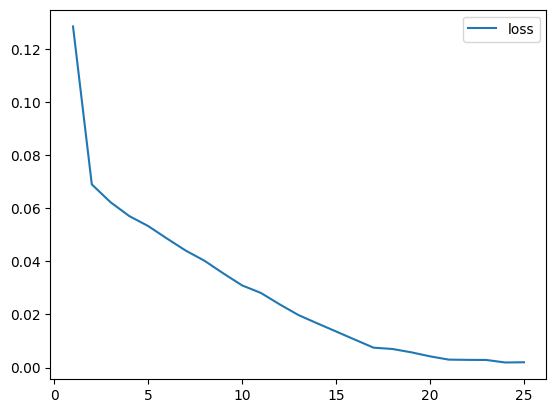

In [100]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

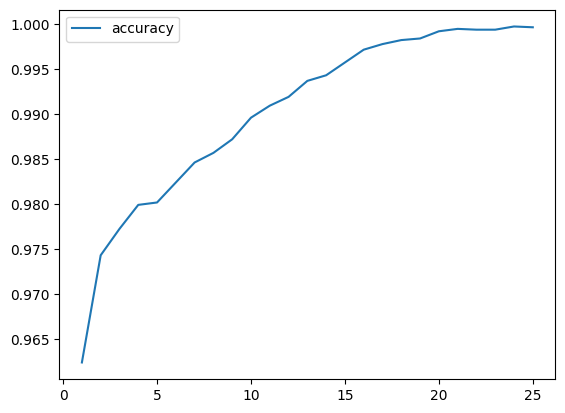

In [101]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# file_export = "/content/drive2/MyDrive/xyz.h5"
# nn.save(file_export)

In [6]:
#------------------------------------------------------------------------Optimization1--#

In [36]:
# Get dummies
number_health_df = pd.get_dummies(health_df)

# number_health_df.head()
number_health_df

,relative_heart_attack,chronic_heart_disease,heart_failure,Total_Cholesterol_mg_dL,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease
0,0,0,0,195.0,0,0,0,10.0,0,1.0,0,0
1,0,0,0,105.0,0,0,0,4.0,0,2.0,0,0
2,0,0,0,172.0,0,0,0,4.0,0,6.0,0,0
3,0,0,0,214.0,0,0,0,6.0,0,2.0,0,0
4,0,0,0,161.0,0,0,0,9.0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5497,0,0,0,203.0,0,0,0,3.0,0,1.0,0,0
5498,0,0,0,200.0,0,0,0,3.0,0,2.0,0,0
5499,0,0,0,234.0,0,0,0,9.0,0,2.0,0,0
5500,0,0,0,155.0,0,0,0,5.0,0,5.0,0,0


In [39]:
# Split our preprocessed data into our features and target arrays
X = number_health_df[["chronic_heart_disease", "heart_failure"]].values
# X = number_health_df[["thyroid","liver_disease"]].values
y = number_health_df["relative_heart_attack"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [40]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(7, activation="relu", input_dim=2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(14, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 7)                 21        
                                                                 
 dense_16 (Dense)            (None, 14)                112       
                                                                 
 dense_17 (Dense)            (None, 1)                 15        
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the data

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
129/129 [==============================] - 1s 6ms/step - loss: 0.3790 - accuracy: 0.8725
Epoch 2/25
129/129 [==============================] - 1s 7ms/step - loss: 0.3788 - accuracy: 0.8725
Epoch 3/25
129/129 [==============================] - 1s 4ms/step - loss: 0.3789 - accuracy: 0.8725
Epoch 4/25
129/129 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8725
Epoch 5/25
129/129 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8725
Epoch 6/25
129/129 [==============================] - 1s 4ms/step - loss: 0.3789 - accuracy: 0.8725
Epoch 7/25
129/129 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8725
Epoch 8/25
129/129 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8725
Epoch 9/25
129/129 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8725
Epoch 10/25
129/129 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8725

In [45]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - loss: 0.3517 - accuracy: 0.8859 - 254ms/epoch - 6ms/step
Loss: 0.35173311829566956, Accuracy: 0.885901153087616


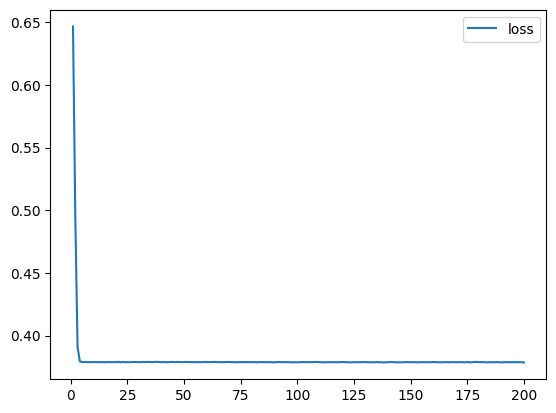

In [46]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

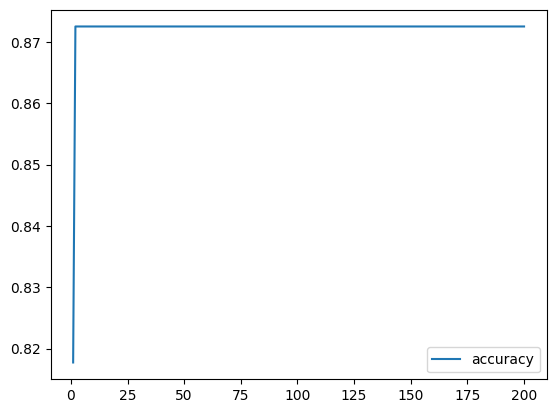

In [47]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
#------------------------------------------------------------------------Optimization2: Tune for hyperparameters--#

In [53]:
# Get dummies if not binary 
number_health_df = pd.get_dummies(health_df)

number_health_df.head()

,relative_heart_attack,chronic_heart_disease,heart_failure,Total_Cholesterol_mg_dL,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease
0,0,0,0,195.0,0,0,0,10.0,0,1.0,0,0
1,0,0,0,105.0,0,0,0,4.0,0,2.0,0,0
2,0,0,0,172.0,0,0,0,4.0,0,6.0,0,0
3,0,0,0,214.0,0,0,0,6.0,0,2.0,0,0
4,0,0,0,161.0,0,0,0,9.0,0,1.0,0,0


In [55]:
# Split our preprocessed data into our features and target arrays
X = number_health_df.drop(["relative_heart_attack"],1).values
y = number_health_df["relative_heart_attack"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-55-bebf46bc315f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = number_health_df.drop(["relative_heart_attack"],1).values


In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [57]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

ModuleNotFoundError: ignored